In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data loading and exploration

In [2]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
cols = ['calories', 'protein', 'fat','sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
df[cols].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


### Comment:
`carbo`, `sugars`, `potass` have some negative values (-1). Wrong values will be replaced by something else later.

In [5]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

### Histograms for better understanding

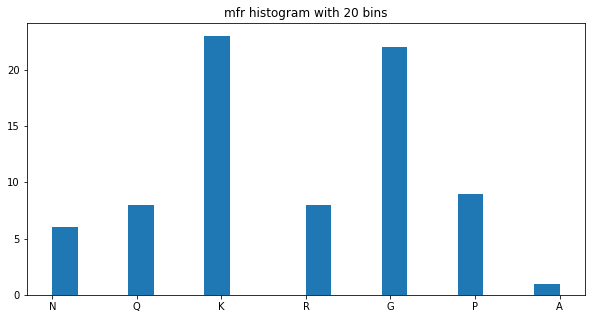

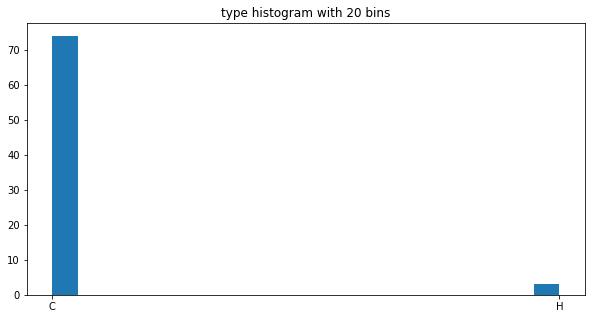

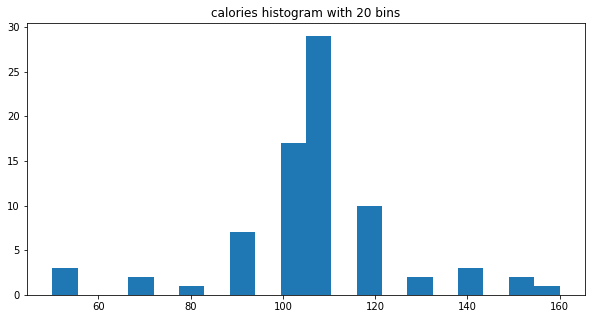

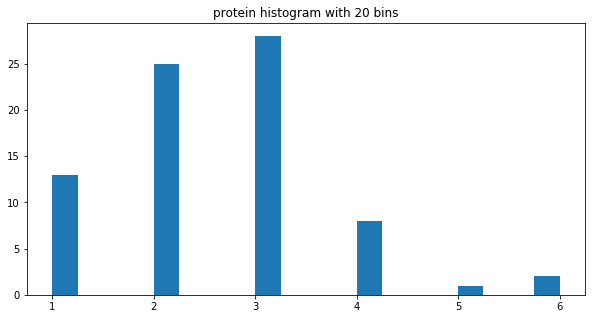

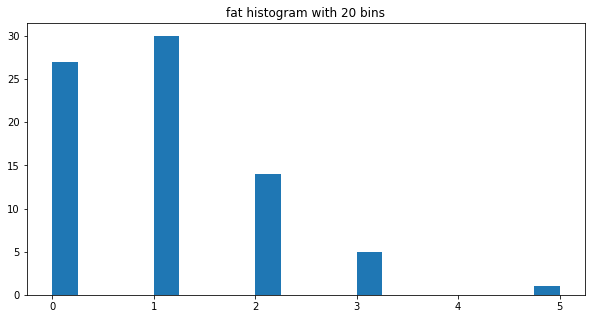

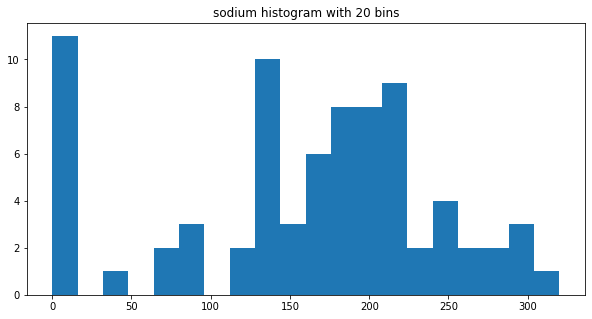

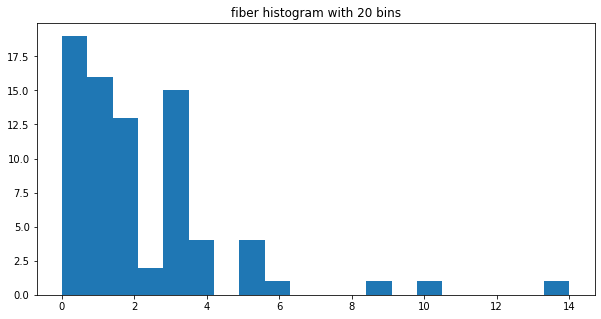

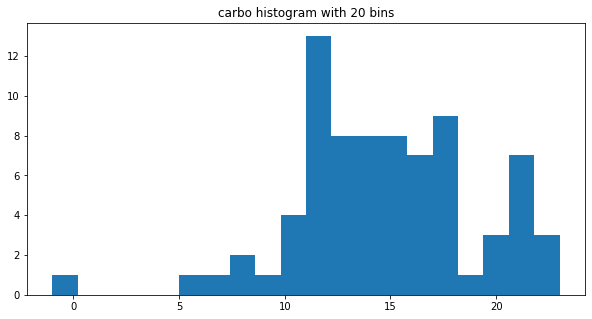

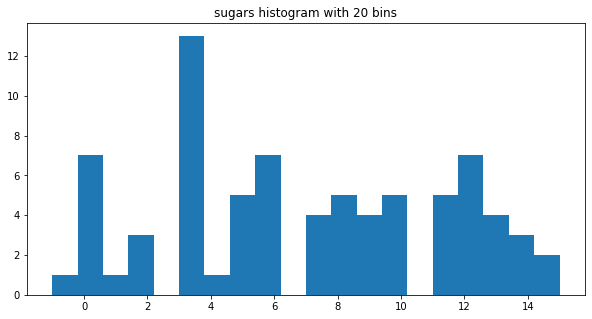

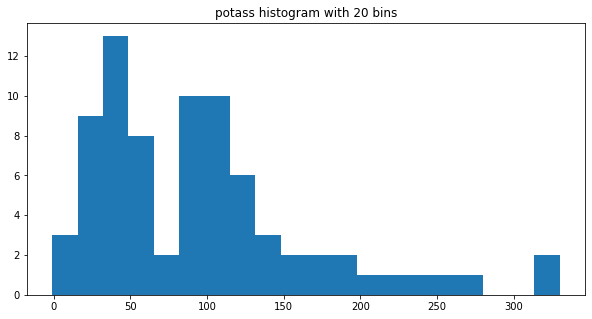

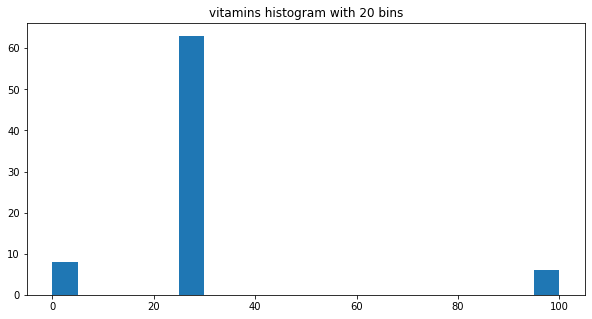

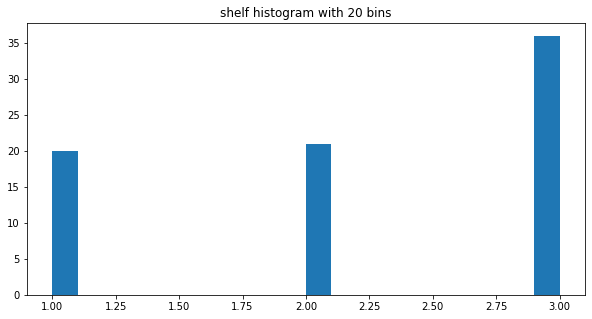

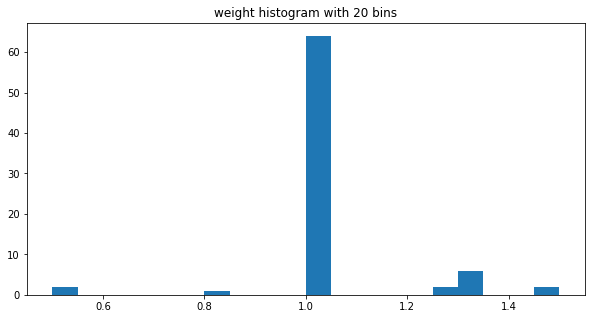

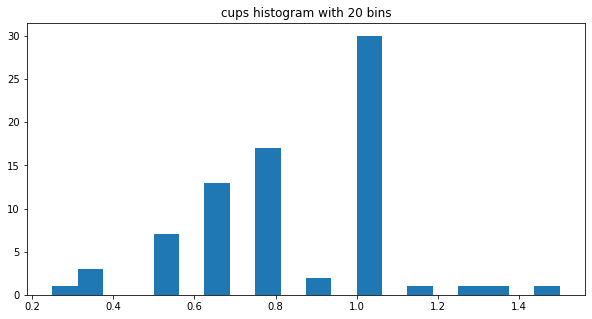

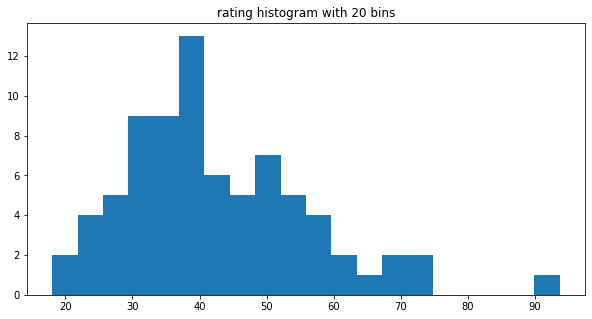

In [6]:
for col in df.columns[1:]: #left col `name` : 77 unique values
    fig = plt.figure(figsize=(10,5))
    bins = 20
    plt.hist(df[col], bins = bins)
    plt.title(str(col) + " histogram with " + str(bins) + " bins")
    plt.show()

### Negative values handling(`carbo`, `sugars`, `potass`) 

In [7]:
df_negative = df[['carbo', 'sugars', 'potass']]
for col in df_negative:
    print('\n' + col + ' value counts')
    print(df[col].value_counts())


carbo value counts
 13.0    8
 15.0    8
 14.0    7
 16.0    7
 21.0    7
 12.0    7
 17.0    6
 11.0    5
 18.0    3
 20.0    3
 8.0     2
 10.5    2
 10.0    2
 22.0    2
 7.0     1
 9.0     1
 19.0    1
 11.5    1
 13.5    1
-1.0     1
 23.0    1
 5.0     1
Name: carbo, dtype: int64

sugars value counts
 3     13
 0      7
 12     7
 6      7
 10     5
 5      5
 8      5
 11     5
 9      4
 7      4
 13     4
 14     3
 2      3
 15     2
 4      1
 1      1
-1      1
Name: sugars, dtype: int64

potass value counts
 110    5
 90     5
 35     5
 25     4
 30     4
 95     4
 40     4
 45     4
 60     3
 100    3
 55     3
 120    3
 190    2
 140    2
 160    2
 170    2
-1      2
 105    2
 240    1
 130    1
 260    1
 135    1
 115    1
 15     1
 20     1
 280    1
 320    1
 65     1
 230    1
 85     1
 80     1
 330    1
 200    1
 50     1
 70     1
 125    1
Name: potass, dtype: int64


Since we have 4 negative values in 3 colums but only 77 rows in dataset, we will try to replace -1 with something else if possible. First, let's print rows with missing values.

In [8]:
for i in df_negative.columns:
    print(df[df[i] == -1])

              name mfr type  calories  protein  fat  sodium  fiber  carbo  \
57  Quaker Oatmeal   Q    H       100        5    2       0    2.7   -1.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  
57      -1     110         0      1     1.0  0.67  50.828392  
              name mfr type  calories  protein  fat  sodium  fiber  carbo  \
57  Quaker Oatmeal   Q    H       100        5    2       0    2.7   -1.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  
57      -1     110         0      1     1.0  0.67  50.828392  
                      name mfr type  calories  protein  fat  sodium  fiber  \
4           Almond Delight   R    C       110        2    2     200    1.0   
20  Cream of Wheat (Quick)   N    H       100        3    0      80    1.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
4    14.0       8      -1        25      3     1.0  0.75  34.384843  
20   21.0       0      -1         0      2     1.0  1.00  64.53

Since row `57` is missing two values, we will drop it. 

In [9]:
df = df.drop([57])
df.shape

(76, 16)

Missing info for `potass` will be replaced with mean value of this column.

In [10]:
bool_index = df.potass == -1
df.loc[bool_index, 'potass'] = df.potass.mean()  

In [11]:
df.iloc[[4,20]]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,95.894737,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,95.894737,0,2,1.0,1.00,64.533816


# Classification problem:
How to choose right shelf for cereal based on given features? 

1. Since we want to use also `mfr` and `type` columns, we need to factorize data for these colums.

In [12]:
cat_feats = ['mfr','type']
df['cat_mfr'] = df.mfr.factorize()[0]
df['cat_type'] = df.type.factorize()[0]
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cat_mfr,cat_type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.000000,25,3,1.0,0.33,68.402973,0,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.000000,0,3,1.0,1.00,33.983679,1,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.000000,25,3,1.0,0.33,59.425505,2,0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.000000,25,3,1.0,0.50,93.704912,2,0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,95.894737,25,3,1.0,0.75,34.384843,3,0


Rearrange columns to have `shelf` values in last column.

In [13]:
cols_at_end = ['shelf']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating,cat_mfr,cat_type,shelf
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.000000,25,1.0,0.33,68.402973,0,0,3
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.000000,0,1.0,1.00,33.983679,1,0,3
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.000000,25,1.0,0.33,59.425505,2,0,3
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.000000,25,1.0,0.50,93.704912,2,0,3
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,95.894737,25,1.0,0.75,34.384843,3,0,3


### Imports for Classifiers

In [14]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

### Creating X, y and splitting the dataset

In [15]:
y = np.array(df.shelf)
X = df.iloc[:,3:-1]
X

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating,cat_mfr,cat_type
0,70,4,1,130,10.0,5.0,6,280.000000,25,1.0,0.33,68.402973,0,0
1,120,3,5,15,2.0,8.0,8,135.000000,0,1.0,1.00,33.983679,1,0
2,70,4,1,260,9.0,7.0,5,320.000000,25,1.0,0.33,59.425505,2,0
3,50,4,0,140,14.0,8.0,0,330.000000,25,1.0,0.50,93.704912,2,0
4,110,2,2,200,1.0,14.0,8,95.894737,25,1.0,0.75,34.384843,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60.000000,25,1.0,0.75,39.106174,4,0
73,110,1,1,140,0.0,13.0,12,25.000000,25,1.0,1.00,27.753301,4,0
74,100,3,1,230,3.0,17.0,3,115.000000,25,1.0,0.67,49.787445,3,0
75,100,3,1,200,3.0,17.0,3,110.000000,25,1.0,1.00,51.592193,4,0


In [16]:
X = X.to_numpy()
X

array([[ 70.      ,   4.      ,   1.      , ...,  68.402973,   0.      ,
          0.      ],
       [120.      ,   3.      ,   5.      , ...,  33.983679,   1.      ,
          0.      ],
       [ 70.      ,   4.      ,   1.      , ...,  59.425505,   2.      ,
          0.      ],
       ...,
       [100.      ,   3.      ,   1.      , ...,  49.787445,   3.      ,
          0.      ],
       [100.      ,   3.      ,   1.      , ...,  51.592193,   4.      ,
          0.      ],
       [110.      ,   2.      ,   1.      , ...,  36.187559,   4.      ,
          0.      ]])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) #using random state to perform the same results

### Scaling features

In [18]:
scaler = MinMaxScaler()
scaler.fit(x_train)

norm_x_train = scaler.transform(x_train)
norm_x_test = scaler.transform(x_test)

### Creating Base Models

In [19]:
classifiers = {
'log_reg': LogisticRegression(),
'knn' : KNeighborsClassifier(),
'r_f' :RandomForestClassifier(),
'SVC': SVC(),
'gausian_nb':GaussianNB(),
'dec_tree' : DecisionTreeClassifier(),
'xgboost': XGBClassifier()}

scores = {}

for classifier in classifiers:
    model = classifiers[classifier]
    print("Training following model:")
    
    print(model)
    train_time = %timeit -n1 -r1 -o model.fit(norm_x_train, y_train)
    print(classifier + ' x_train score:', model.score(norm_x_train, y_train))
    y_pred = model.predict(norm_x_test)
    print(classifier + ' x_test score:', accuracy_score(y_test, y_pred))
    print('-------------------------------------------------------------------------------','\n')
    
    scores[classifier]= {'model': model, 
                         'train_time': train_time.average, 
                         'train_score': model.score(norm_x_train, y_train), 
                         'test_score': accuracy_score(y_test, y_pred)
                        }

Training following model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
14.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
log_reg x_train score: 0.7
log_reg x_test score: 0.75
------------------------------------------------------------------------------- 

Training following model:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
1.37 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
knn x_train score: 0.7
knn x_test score: 0.625
------------------------------------------------------------------------------- 

Training following model:
RandomForestCl

### Plotting results

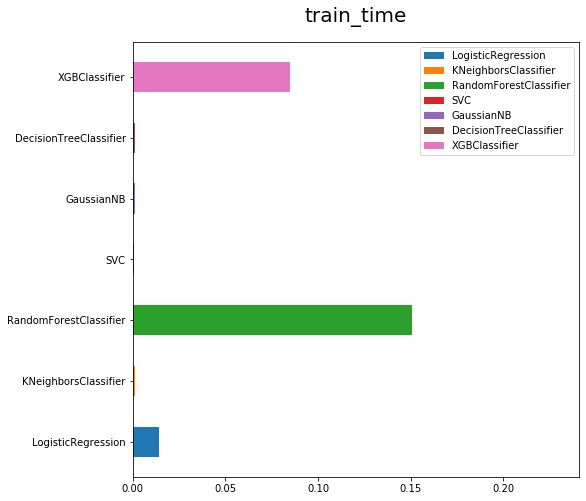

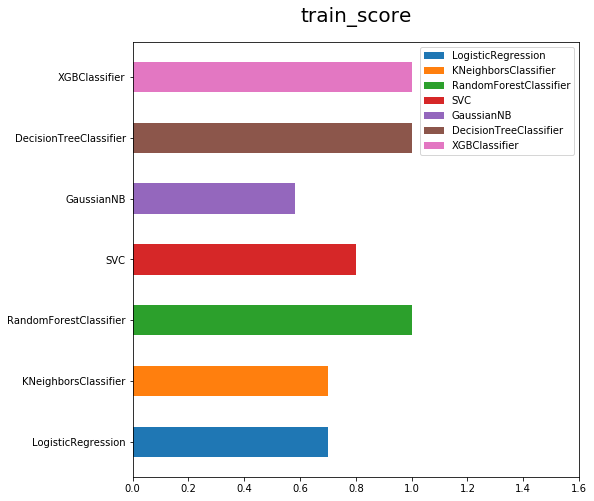

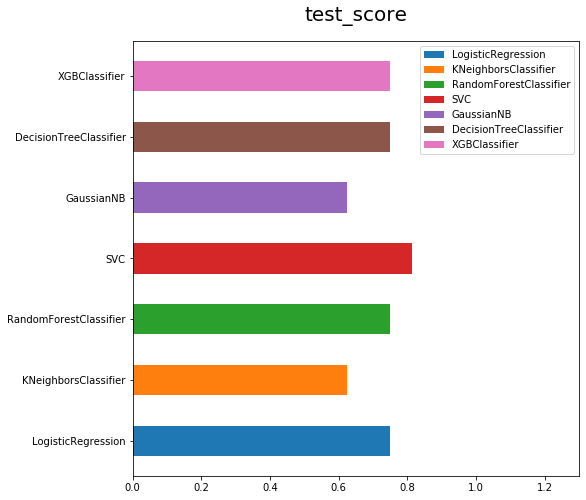

In [20]:
def plot_results(scores):
    params_list = {'names': [], 'train_time':[], 'train_score':[], 'test_score':[]}
    for model in scores:
        params_list['names'].append(type(scores[model]['model']).__name__)
        params_list['train_time'].append(scores[model]['train_time'])
        params_list['train_score'].append(scores[model]['train_score'])
        params_list['test_score'].append(scores[model]['test_score'])

    for i in list(params_list.keys())[1:]:
        fig = plt.figure(figsize = (8,8))
        for idx, name in enumerate(params_list['names']):
            plt.barh(name, params_list[i][idx], height=0.5, label = name)
            plt.xlim(0, max(params_list[i])*1.6)
            plt.title(i, fontdict={'fontsize': 20}, pad = 20)
        plt.legend()
        plt.show()
plot_results(scores)